#### PS: Tune-in to the summary at last for what worked best for me, if you dont have much time for this big notebook!

### Problem Statement

Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

### Data Dictionary

#### Train Data
- ID: Unique Identifier for a row

- Store_id: Unique id for each Store

- Store_Type: Type of the Store

- Location_Type: Type of the location where Store is located

- Region_Code: Code of the Region where Store is located

- Date: Information about the Date

- Holiday: If there is holiday on the given Date, 1 : Yes, 0 : No

- Discount: If discount is offered by store on the given Date, Yes/ No

- Orders: Number of Orders received by the Store on the given Day

- Sales: Total Sale for the Store on the given Day

#### Test Data
- ID: Unique Identifier for a row

- Store_id: Unique id for each Store

- Store_Type: Type of the Store

- Location_Type: Type of the location where Store is located

- Region_Code: Code of the Region where Store is located

- Date: Information about the Date

- Holiday: If there is holiday on the given Date, 1 : Yes, 0 : No

- Discount: If discount is offered by store on the given Date, Yes/ No

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("TRAIN.csv")
train.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test = pd.read_csv("TEST_FINAL.csv")
test.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
train.shape , test.shape

((188340, 10), (22265, 8))

### Data Pre-processing

In [5]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   S

(None, None)

In [6]:
train.isnull().sum(), test.isnull().sum()

(ID               0
 Store_id         0
 Store_Type       0
 Location_Type    0
 Region_Code      0
 Date             0
 Holiday          0
 Discount         0
 #Order           0
 Sales            0
 dtype: int64,
 ID               0
 Store_id         0
 Store_Type       0
 Location_Type    0
 Region_Code      0
 Date             0
 Holiday          0
 Discount         0
 dtype: int64)

In [7]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [8]:
# train_t = train.T
# test_t = test.T
# train_t.duplicated().sum(), test_t.duplicated().sum()

In [9]:
test.head()
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [10]:
y = train.Sales
train_new = train.drop(["Sales"],axis=1)

#### Differentiating Numericala and Categorical Data for further processing

In [11]:
#We have 2 types of data in our dataset : int64 and object

train_categorical = train_new.select_dtypes(exclude = ['int64'])
test_categorical = test.select_dtypes(exclude = ['int64'])

train_numerical = train_new.select_dtypes(include = ['int64'])
test_numerical = test.select_dtypes(include = ['int64'])

#Defining column names for numerical data
numcol_names_train = train_numerical.columns.values
numcol_names_test = test_numerical.columns.values
numcol_names_train

array(['Store_id', 'Holiday', '#Order'], dtype=object)

In [12]:
#Converting these to list from array
numcol_names_train.tolist(), numcol_names_test.tolist()

(['Store_id', 'Holiday', '#Order'], ['Store_id', 'Holiday'])

#### Checking Skewness and Kurtosis for Numerical Columns

/Users/shelvigarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


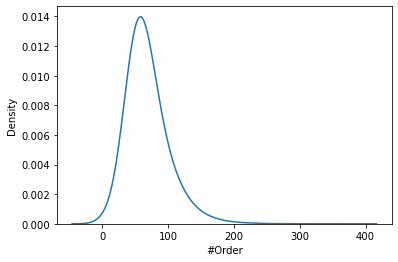

In [13]:
sns.kdeplot(train_numerical['#Order'], bw=0.5)    #bw is smoothing parameter
plt.show()

#### Encoding categorical Data

In [14]:
from sklearn.preprocessing import LabelEncoder

train_categorical = train_categorical.apply(LabelEncoder().fit_transform)
test_categorical = test_categorical.apply(LabelEncoder().fit_transform)

#Combining the Numnerical and Categorical Database
train_new= pd.concat([train_categorical,train_numerical,y],axis=1)

test_new = pd.concat([test_categorical,test_numerical],axis=1)
train_new.head()

,ID,Store_Type,Location_Type,Region_Code,Date,Discount,Store_id,Holiday,#Order,Sales
0,0,0,2,0,0,1,1,1,9,7011.84
1,1,3,1,0,0,1,253,1,60,51789.12
2,2,2,1,0,0,1,252,1,42,36868.20
3,3,1,2,0,0,1,251,1,23,19715.16
4,4,1,2,3,0,1,250,1,62,45614.52


In [15]:
test_new.head(5)

,ID,Store_Type,Location_Type,Region_Code,Date,Discount,Store_id,Holiday
0,0,3,1,2,0,0,171,0
1,1,0,0,0,0,0,172,0
2,2,3,1,0,0,0,173,0
3,3,0,0,3,0,0,174,0
4,4,0,0,1,0,0,170,0


#### Correlations:

<function matplotlib.pyplot.show(close=None, block=None)>

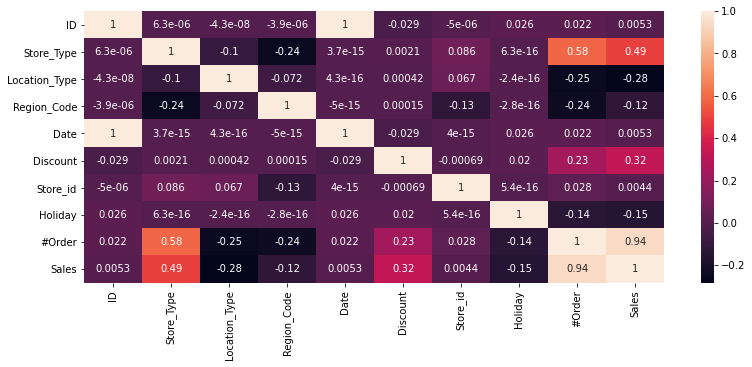

In [16]:
#For coplete Database
corr_train = train_new.corr()
plt.figure(figsize=(13,5)) 

ax = sns.heatmap(corr_train,annot=True)
plt.show

In [17]:
imp = train_new.drop("Sales", axis=1).apply(lambda x: x.corr(train_new["Sales"]))
indices = np.argsort(imp)
print(imp[indices])     #Sorted in ascending order

Location_Type   -0.283771
Holiday         -0.154779
Region_Code     -0.121003
Store_id         0.004377
Date             0.005266
ID               0.005269
Discount         0.323906
Store_Type       0.492471
#Order           0.941601
dtype: float64


#### Removing Variable with Low correlation with Target Variables

In [18]:
for i in range(0, len(indices)):
    if np.abs(imp[i]) < 0.1:
        print(train_new.columns[i])

ID
Date
Store_id


In [19]:
train_new.drop(["Date","Store_id"],axis=1,inplace=True)

In [20]:
train_new.head()

,ID,Store_Type,Location_Type,Region_Code,Discount,Holiday,#Order,Sales
0,0,0,2,0,1,1,9,7011.84
1,1,3,1,0,1,1,60,51789.12
2,2,2,1,0,1,1,42,36868.20
3,3,1,2,0,1,1,23,19715.16
4,4,1,2,3,1,1,62,45614.52


In [21]:
test_new.drop(["Date","Store_id"],axis=1,inplace=True)
test_new.head()

,ID,Store_Type,Location_Type,Region_Code,Discount,Holiday
0,0,3,1,2,0,0
1,1,0,0,0,0,0
2,2,3,1,0,0,0
3,3,0,0,3,0,0
4,4,0,0,1,0,0


#### Checking Predictors Co-relation With each other

In [22]:
for i in range(0,len(train_new.columns)):
    for j in  range(0,len(train_new.columns)):
        if i!=j:
            corr_1=np.abs(train_new[train_new.columns[i]].corr(train_new[train_new.columns[j]]))
            if corr_1 <0.3:
                print( train_new.columns[i] , " is not correlated  with ", train_new.columns[j])
            elif corr_1>0.75:
                print( train_new.columns[i] , " is highly  correlated  with ", train_new.columns[j])

ID  is not correlated  with  Store_Type
ID  is not correlated  with  Location_Type
ID  is not correlated  with  Region_Code
ID  is not correlated  with  Discount
ID  is not correlated  with  Holiday
ID  is not correlated  with  #Order
ID  is not correlated  with  Sales
Store_Type  is not correlated  with  ID
Store_Type  is not correlated  with  Location_Type
Store_Type  is not correlated  with  Region_Code
Store_Type  is not correlated  with  Discount
Store_Type  is not correlated  with  Holiday
Location_Type  is not correlated  with  ID
Location_Type  is not correlated  with  Store_Type
Location_Type  is not correlated  with  Region_Code
Location_Type  is not correlated  with  Discount
Location_Type  is not correlated  with  Holiday
Location_Type  is not correlated  with  #Order
Location_Type  is not correlated  with  Sales
Region_Code  is not correlated  with  ID
Region_Code  is not correlated  with  Store_Type
Region_Code  is not correlated  with  Location_Type
Region_Code  is not c

### Dealing with Outliers:`

/Users/shelvigarg/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


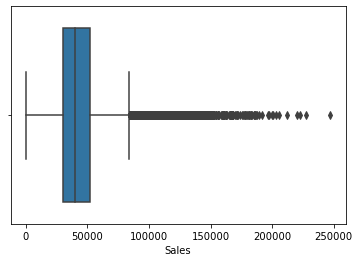

In [23]:
out = sns.boxplot(train_new["Sales"])
plt.show()

In [24]:
Q1 = train_new["Sales"].quantile(0.25)
Q3 = train_new["Sales"].quantile(0.75)
IQR = Q3 - Q1

filter = (train_new["Sales"] >= Q1 - 1.5 * IQR) & (train_new["Sales"] <= Q3 + 1.5 *IQR)
train2 = train_new.loc[filter]  
print("data loss percentage {}%".format(((len(train_new) - len(train2))/len(train_new))*100))

data loss percentage 3.1023680577678667%


### Modelling

In [25]:
# Split the Train data into predictors and target

x = train_new.drop(['Sales',"ID","#Order"],axis=1)
y = train_new['Sales']

test_set = test_new.drop("ID",axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

#### Model 1: Linear regression

In [27]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()  
model1.fit(x_train, y_train)

LinearRegression()

In [28]:
#Prediction from validation set
y_pred_model1= model1.predict(x_test)

print("Prediction for test set: {}".format(y_pred_model1))

Prediction for test set: [59749.46672954 41478.37110728 60689.76524565 ... 34264.00645797
 51430.17465341 35056.31966237]


In [29]:
model1.score(x_test,y_test)

0.43503346141472965

In [30]:
import sklearn.preprocessing
y_pred_model1_p = sklearn.preprocessing.minmax_scale(y_pred_model1, feature_range=(0,1))
y_test_p = sklearn.preprocessing.minmax_scale(y_test, feature_range=(0,1))

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test_p, y_pred_model1_p)

0.0784943352944383

In [31]:
#Prediction from test set
test_pred_model1= model1.predict(test_set)
print("Prediction for test set: {}".format(test_pred_model1))

Prediction for test set: [50960.02539536 35056.31966237 51900.32391146 ... 46116.4882029
 33645.87188821 41402.65966764]


In [32]:
frame = { 'ID': test.ID, 'Sales': test_pred_model1 }
sub1 = pd.DataFrame(frame)
sub1.set_index('ID', inplace=True)
sub1 = sub1.to_csv("sub1.csv")

#### Model 2: Decision Tree:

In [33]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor() 
model2.fit(x_train, y_train)

#Prediction for validation set
y_pred_model2 = model2.predict(x_test)

#MSLE FOR Validation data
mean_squared_log_error(y_test, y_pred_model2)

0.12244172113775871

In [34]:
model2.score(x_test,y_test)

0.5770125628794551

In [35]:
#Prediction from test set
test_pred_model2= model2.predict(test_set)

frame = { 'ID': test.ID, 'Sales': test_pred_model2}
sub2 = pd.DataFrame(frame)
sub2.set_index('ID', inplace=True)
sub2 = sub2.to_csv("sub2.csv")

#### Model 4:  Random Forest regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
model4.score(x_test,y_test)

0.5770510136286676

In [38]:
#Prediction for validation set
y_pred_model4 = model4.predict(x_test)

#MSLE FOR Validation data
mean_squared_log_error(y_test, y_pred_model4)

0.1224299330951216

In [39]:
#Prediction from test set
test_pred_model4 = model4.predict(test_set)

frame = { 'ID': test.ID, 'Sales': test_pred_model4}
sub4 = pd.DataFrame(frame)
sub4.set_index('ID', inplace=True)
sub4 = sub4.to_csv("sub4.csv")

#### Model 5: XG Boost

In [40]:
import xgboost as xg
model5 = xg.XGBRegressor(n_estimators = 500, seed = 100)
model5.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [41]:
model5.score(x_test,y_test)

0.577012487759418

In [42]:
#Prediction for validation set
y_pred_model5 = model5.predict(x_test)

#MSLE FOR Validation data
mean_squared_log_error(y_test, y_pred_model5)

0.12244179565043099

In [43]:
#Prediction from test set
test_pred_model5 = model5.predict(test_set)

frame = { 'ID': test.ID, 'Sales': test_pred_model5}
sub5 = pd.DataFrame(frame)
sub5.set_index('ID', inplace=True)
sub5 = sub5.to_csv("sub5.csv")

#### Model 6: Following data centric approach : Inproving data

predicting number of orders first before predicting sales number

In [44]:
x1 = train_new.drop(['Sales',"ID","#Order"],axis=1)
y1 = train_new['#Order']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 100)

model61 = RandomForestRegressor(n_estimators=500)
model61.fit(x1_train, y1_train)

#Prediction for validation set
y_pred_model61 = model61.predict(x1_test)

#MSLE FOR Validation data
accuracy_pred_orders = model61.score(x1_test,y1_test)

accuracy_pred_orders 

0.620480265678482

In [45]:
y_pred_model61[0].dtype

dtype('float64')

In [46]:
#Prediction of orders for test data:
pred_order_test = model61.predict(test_set)
pred_order_test = pd.Series(pred_order_test)

test_set_new = pd.concat([test_set,pred_order_test],axis=1)

test_set_new.rename({0: '#Order'}, axis=1,inplace=True)

In [47]:
pred_order_test.head(3)

0     83.874532
1     52.741119
2    109.135833
dtype: float64

In [48]:
test_set_new.head()

,Store_Type,Location_Type,Region_Code,Discount,Holiday,#Order
0,3,1,2,0,0,83.874532
1,0,0,0,0,0,52.741119
2,3,1,0,0,0,109.135833
3,0,0,3,0,0,53.387572
4,0,0,1,0,0,55.758549


#### Applying new test dataset on model6:

In [49]:
from sklearn.ensemble import RandomForestRegressor
model6 = RandomForestRegressor()

x2 = train_new.drop(["ID","Sales"],axis=1)
y2 = train_new['Sales']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 100)

model6.fit(x2_train, y2_train)

#Prediction for validation set
y_pred_model6 = model6.predict(x2_test)

#MSLE FOR Validation data
mean_squared_log_error(y2_test, y_pred_model6)

0.011144201646663274

In [50]:
#Prediction from test set
test_pred_model6 = model6.predict(test_set_new)

frame = { 'ID': test.ID, 'Sales': test_pred_model6}
sub6 = pd.DataFrame(frame)
sub6.set_index('ID', inplace=True)
sub6 = sub6.to_csv("sub6.csv")

#### Model 7 : Without Removing Columns that had Less corelation with target:

In [51]:
x2 = train.drop(["ID","Sales"],axis=1)
x2_test = test.drop("ID",axis=1)
y2 = train.Sales

x2_categorical = x2.select_dtypes(exclude = ['int64'])
x2_numerical = x2.select_dtypes(include = ['int64'])

x2_test_categorical = x2_test.select_dtypes(exclude = ['int64'])
x2_test_numerical = x2_test.select_dtypes(include = ['int64'])


x2_categorical = x2_categorical.apply(LabelEncoder().fit_transform)
x2_test_categorical = x2_test_categorical.apply(LabelEncoder().fit_transform)

#Combining the Numnerical and Categorical Database
x2 = pd.concat([x2_categorical,x2_numerical],axis=1)
x2_test = pd.concat([x2_test_categorical,x2_test_numerical,pred_order_test],axis=1)
x2_test.rename({0: '#Order'}, axis=1,inplace=True)

x2_test.shape
from sklearn.ensemble import RandomForestRegressor
model7 = RandomForestRegressor()

x2_train, x22_test, y2_train, y22_test = train_test_split(x2, y2, test_size = 0.2, random_state = 100)

model7.fit(x2_train, y2_train)

#Prediction for validation set
y_pred_model7 = model7.predict(x22_test)

#MSLE FOR Validation data
mean_squared_log_error(y22_test, y_pred_model7)

0.005319555848628216

In [52]:
model7.score(x22_test,y22_test)

0.9747825903364256

In [53]:
#Prediction from test set
test_pred_model7 = model7.predict(x2_test)

frame = { 'ID': test.ID, 'Sales': test_pred_model7}
sub7 = pd.DataFrame(frame)
sub7.set_index('ID', inplace=True)
sub7 = sub7.to_csv("sub7.csv")

In [54]:
test_pred_model7.shape  

(22265,)

the above model gave worst score on test data ! hence , overfitting. my best bet until now is removing less correlational columns and predicting the orders forst than predicting sales gave almost equal results on test data as that of not considering order column

In [55]:
#Generating Pandas Profiling Report for better analysis:
import pandas_profiling
profile = train.profile_report()
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

from the above survey of profile , i can see that their is huge discrepancy in the holiday column, hence i will apply upsampling for this column and then predict results.

#### Oversampling to balance Holiday Column:

In [56]:
from sklearn.utils import resample

y = train_new.Holiday
x = train_new.drop("Holiday",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

d = pd.concat([x_train,y_train],axis=1)

holi = train_new[train_new.Holiday==1]
not_holi = train_new[train_new.Holiday==0]

#resample minority
holi_resampled = resample(holi,replace=True,n_samples=len(not_holi))

resampled = pd.concat([holi_resampled,not_holi])

resampled.Holiday.value_counts()

0    163520
1    163520
Name: Holiday, dtype: int64

In [57]:
resampled.head()

,ID,Store_Type,Location_Type,Region_Code,Discount,Holiday,#Order,Sales
156070,156070,2,1,2,0,1,116,99384.00
108289,108289,2,1,3,0,1,63,38833.95
172949,172949,2,0,3,1,1,72,45428.01
105752,105752,3,0,0,0,1,46,22854.15
118412,118412,3,1,0,0,1,115,58648.32


In [58]:
x_train = resampled.drop(["ID","Sales","#Order"],axis=1)
y_train = resampled.Sales

In [59]:
x_train.head()

,Store_Type,Location_Type,Region_Code,Discount,Holiday
156070,2,1,2,0,1
108289,2,1,3,0,1
172949,2,0,3,1,1
105752,3,0,0,0,1
118412,3,1,0,0,1


In [60]:
test_new.drop("ID",axis=1,inplace=True)

#### Model 8: Applying Model on resampled data

In [61]:
model8 = RandomForestRegressor()

model8.fit(x_train, y_train)

# #Prediction from test set
# test_pred_model8 = model8.predict(test_new)

# frame = { 'ID': test.ID, 'Sales': test_pred_model8}
# sub8 = pd.DataFrame(frame)
# sub8.set_index('ID', inplace=True)
# sub8 = sub8.to_csv("sub8.csv")

RandomForestRegressor()

#### resampling didnt perform that well!

### Model 9: ARIMA MODEL:

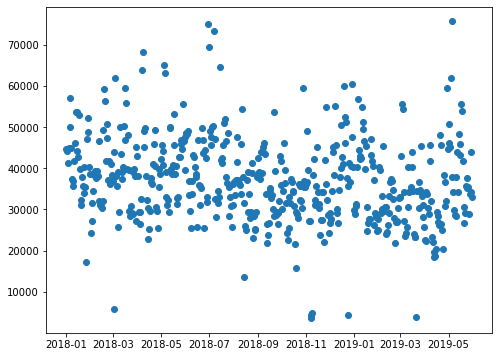

In [93]:
train = pd.read_csv("TRAIN.csv",parse_dates=True)
test = pd.read_csv("TEST_FINAL.csv",parse_dates=True)

train['Date'] =  pd.to_datetime(train['Date'])

#Leaving date and label column out of category encoding
y = train[["Sales","Date"]]
train_new = train.drop(["Sales","Date","ID"],axis=1)

y1 = test[["Date"]]
test_new = test.drop(["Date","ID"],axis=1)

#We have 2 types of data in our dataset : int64 and object

train_categorical = train_new.select_dtypes(exclude = ['int64'])
test_categorical = test_new.select_dtypes(exclude = ['int64'])

train_numerical = train_new.select_dtypes(include = ['int64'])
test_numerical = test_new.select_dtypes(include = ['int64'])

#Defining column names for numerical data
numcol_names_train = train_numerical.columns.values
numcol_names_test = test_numerical.columns.values
numcol_names_train


from sklearn.preprocessing import LabelEncoder

train_categorical = train_categorical.apply(LabelEncoder().fit_transform)
test_categorical = test_categorical.apply(LabelEncoder().fit_transform)

#Combining the Numnerical and Categorical Database
train_new= pd.concat([train_categorical,train_numerical,y],axis=1)

test_new = pd.concat([test_categorical,test_numerical,y1],axis=1)


#Removing order as it will not be present in test dataset
train_new.drop(["#Order"],axis=1,inplace=True)



train2 = train_new[train_new["Store_id"] == 100]
train2

from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.scatter(train2.Date,train2.Sales)
plt.show()

<AxesSubplot:xlabel='Date'>

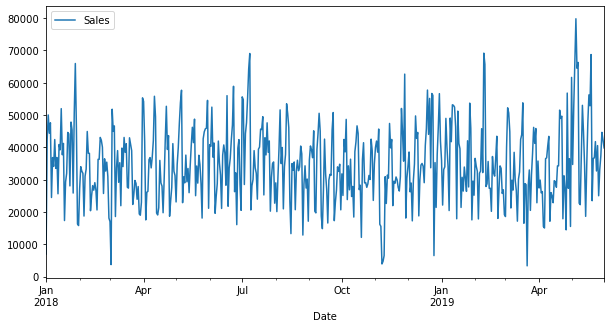

In [63]:
# Updating the header

data1 = train_new[(train_new["Store_id"] == 1)]
data11 = data1[["Sales","Date"]]
data11.columns=["Sales","Date"]

data11 = data11.set_index('Date')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
data11.plot()

#### For ARIMA first thing we do is identify if the data is stationary or non – stationary. if data is non-stationary we will try to make them stationary then we will process further

- Ho: It is non-stationary
- H1: It is stationary

We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

In [64]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data11['Sales'])

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")
        

In [65]:
adfuller_test(data11['Sales'])

ADF Test Statistic : -4.089691325020226
p-value : 0.0010072301346594633
#Lags Used : 13
Number of Observations : 502
Data is stationary


#### Auto regressive model

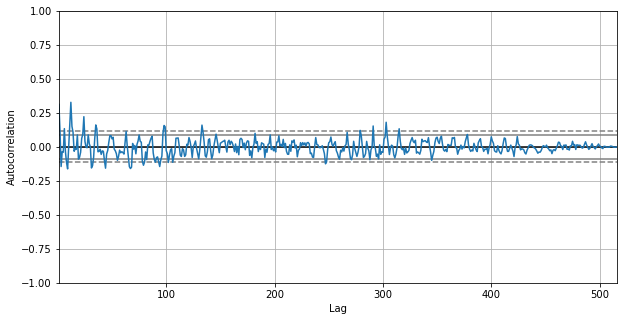

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data11['Sales'])
plt.show()

In [67]:
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

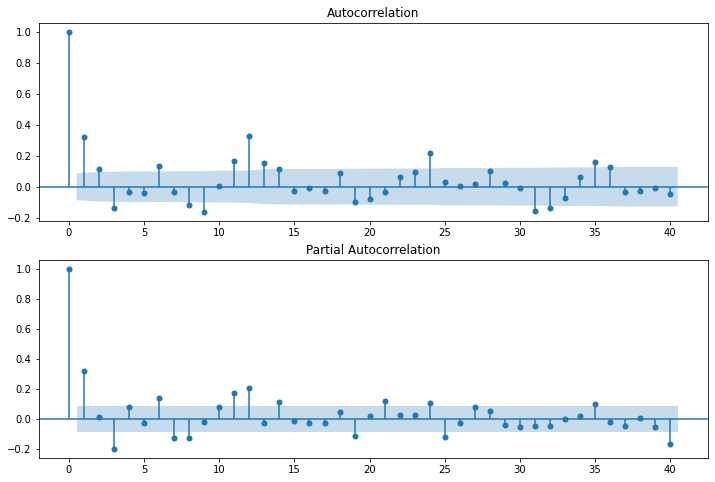

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data11['Sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data11['Sales'].iloc[13:],lags=40,ax=ax2)

In [69]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [70]:
def prediction_for_store(store_id=None, train_new = train_new, test_new = test_new):
    train = train_new[(train_new["Store_id"] == store_id)]
    train = train[["Sales","Date"]]
    train.columns=["Sales","Date"]
    train = train.set_index('Date')
    
    test = test_new[(test_new["Store_id"] == store_id)]
    
    test_result = adfuller(train['Sales'])
    
    start = len(train)
    end = len(train) + len(test) - 1

    p_values = range(1,2)
    d_values = range(0,1)
    q_values = range(0,1)
    
    
    prediction_store = []
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                for i in range(len(test)):
                    try:
                        model=ARIMA(train['Sales'],order)
                        model_fit=model.fit(disp=0)
                        pred_y = model_fit.forecast()[0]
                        prediction_store.append(pred_y)
                    except:
                        continue
    return prediction_store

In [71]:
predictions = []
for i in range(365):
    pred = prediction_for_store(i+1)
    predictions.append(pred)

In [72]:
result=[]
for prediction in predictions:
    for data in prediction:
        result.extend(data)
        
len(result)

22265

In [73]:
frame = { 'ID': test.ID, 'Sales': result}
arima = pd.DataFrame(frame)
arima.set_index('ID', inplace=True)
arima = arima.to_csv("arima.csv")

### Model 10: Model by grouping Store_id values together:

In [74]:
sales_mean = train_new.groupby(['Store_id', 'Discount',"Holiday","Store_Type","Region_Code","Location_Type"]).agg({"Sales":"mean"})
sales_mean.reset_index(inplace=True)

In [75]:
sales_mean.head()

,Store_id,Discount,Holiday,Store_Type,Region_Code,Location_Type,Sales
0,1,0,0,0,0,2,29055.463415
1,1,0,1,0,0,2,24987.038824
2,1,1,0,0,0,2,43726.663366
3,1,1,1,0,0,2,31600.203529
4,2,0,0,2,2,0,39084.195122


In [76]:
x = sales_mean.drop(["Sales","Region_Code","Location_Type","Store_Type"],axis=1)
y = sales_mean.Sales

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

In [78]:
from sklearn.ensemble import RandomForestRegressor
model14 = RandomForestRegressor()
model14.fit(x_train,y_train)

pred= model14.predict(x_test)

model14.score(x_test,y_test)

-0.28419957761944925

In [79]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(pred,y_test)

0.13857664654957058

In [80]:
# pred14 = model14.predict(test_set)
# frame = { 'ID': test.ID, 'Sales': pred14}
# sales_mean = pd.DataFrame(frame)
# sales_mean.set_index('ID', inplace=True)
# sales_mean = sales_mean.to_csv("sales_mean.csv")

### Model 11: Mean of  Outcomes from 2 models

In [81]:
x = train_new.drop(["Sales","Date"],axis=1)
y = train_new.Sales

In [82]:
# from catboost import CatBoostRegressor

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

# model10 = CatBoostRegressor()
# # Fit model
# model10.fit(x_train,y_train)

# # Get predictions
# pred10 = model10.predict(x_test)
# preds_catboost = model10.predict(test_set)

# accuracy_train10 = model10.score(x_test,y_test)

# accuracy_train10

In [83]:
# model11 = xg.XGBRegressor()
  

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

# # Fitting the model
# model11.fit(x_train,y_train)
  
# # Predict the model
# pred11 = model11.score(x_test,y_test)
# preds_xgboost = model11.predict(test_set)

In [84]:
# sum1 = []
# for i in range(len(preds_xgboost)):
#     sum1.append(np.sum(preds_xgboost[i]+ preds_catboost[i])/2)
# sum1 

#### Same results as with single model

### Model 12: With grid search params

In [85]:
# n_estimators = [ int(x) for x in np.linspace(start=100,stop=1000,num=10)]
# max_features = [ "auto","sqrt"]
# max_depth= [2,4]

# # min_sample_split= [2,4]
# min_samples_leaf = [1,6]
# bootstrap = [True,False]

# #Creating param grid
# param_grid = {"n_estimators":n_estimators,
#     "max_features" : max_features,
#     "max_depth" : max_depth,
# #     "min_sample_split" : min_sample_split,
#     "min_samples_leaf" : min_samples_leaf,
#     "bootstrap" : bootstrap}
        
# print(param_grid)
    
# from sklearn.ensemble import RandomForestRegressor
# model9 = RandomForestRegressor()
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator= model9,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

# grid_search.fit(x_train,y_train)

In [86]:
# grid_search.best_params_

In [87]:
# grid_train = grid_search.score(x_test,y_test)
# grid13 = grid_search.predict(test_set)

# grid_train

In [88]:
# frame = { 'ID': test.ID, 'Sales': grid13}
# sub13 = pd.DataFrame(frame)
# sub13.set_index('ID', inplace=True)
# sub13 = sub13.to_csv("sub13.csv")

#### grid search recommended features:
    
bootstrap= True,max_depth= 4,max_features= "sqrt",min_samples_leaf= 6, n_estimators= 1000

### Final Outcome

After exhaustive attempts of 3 days and giving my best, I received the best MSLE*1000 Error of 225. I tried multiple approaches, used the data-centric approach by making changes to data multiple times (as many ways as my brain could think of) apart from changing models. 

I tried multiple models (approx 10), also implemented an algorithm I never used before ARIMA (in this hectic pressures!), much to my disappointment the model didn’t perform that well as compared to ordinary ones.

I also tried to group the data for same-store and make prediction store-wise instead of generic, which also didn’t result in good results test results though performed exceptionally on my train dataset(overfitting because of fewer train data when clubbed).

My best results were in the most simple approach, all the good models gave me almost equal results, with all features except Date, the params when kept at default performed best in my case(Still don’t know how, but open to wonders)!

As this hackathon nears the closure, my mind is still restless with what can be the approach followed by one who has 20-30 points less error than mine. (eagerly waiting for top coder code file!!)

Still, I feel satisfied as I gave my 100% at every hour of this 3-day challenge and learned a lot!

Peace :)
